<a href="https://colab.research.google.com/github/jeron-williams/Helmnet-CNN-Transfer-Learning/blob/main/HelmNet_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [ ]:
# Import the main TensorFlow library
# TensorFlow is an open-source machine learning framework developed by Google
import tensorflow as tf

# Import Keras - a high-level neural networks API
# Keras provides a user-friendly interface for building and training deep learning models
import keras

# Import Keras from TensorFlow (tf.keras is the integrated version)
# Since TensorFlow 2.0, Keras is tightly integrated into TensorFlow
from tensorflow import keras

# Import layers and models modules from Keras
# - layers: Contains building blocks for neural networks (Dense, Conv2D, etc.)
# - models: Contains model architectures (Sequential, Functional API)
from tensorflow.keras import layers, models

# Print the version of TensorFlow being used
# Useful for debugging and ensuring compatibility with code/libraries
print("TensorFlow version:", tf.__version__)

# Print the version of Keras being used
# Important for reproducibility and troubleshooting version-specific issues
print("Keras version:", keras.__version__)

# Check and print available GPU devices
# GPUs significantly accelerate deep learning training
# Returns a list of GPU devices (empty list if no GPU available)
print("GPUs available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
Keras version: 3.10.0
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# ============================================================================
# STANDARD PYTHON LIBRARIES
# ============================================================================

# Operating system interface - for file/directory operations
import os

# Random number generation - for reproducibility and sampling
import random

# NumPy - fundamental package for numerical computing in Python
# Used for array operations, matrix math, and numerical computations
import numpy as np

# Pandas - data manipulation and analysis library
# Used for reading CSV files, data cleaning, and tabular data operations
import pandas as pd

# Seaborn - statistical data visualization library built on matplotlib
# Used for creating attractive and informative statistical graphics
import seaborn as sns

# Matplotlib image module - for reading and displaying images
import matplotlib.image as mpimg

# Matplotlib pyplot - main plotting interface for creating visualizations
# Used for displaying images, plots, graphs, and charts
import matplotlib.pyplot as plt

# Math module - provides mathematical functions and constants
# Used for mathematical operations like sqrt, log, trigonometric functions
import math

# OpenCV (cv2) - computer vision library
# Used for image processing, transformations, and manipulation
import cv2


# ============================================================================
# TENSORFLOW/KERAS MODULES - DEEP LEARNING FRAMEWORK
# ============================================================================

# ImageDataGenerator - for real-time data augmentation during training
# Applies random transformations (rotation, zoom, flip) to images on-the-fly
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Sequential - linear stack of layers model architecture
# Simplest way to build a neural network layer-by-layer
from tensorflow.keras.models import Sequential

# Neural network layer types:
# - Dense: Fully connected layer (each neuron connects to all neurons in previous layer)
# - Dropout: Regularization technique that randomly drops neurons during training
# - Flatten: Converts multi-dimensional data into 1D vector
# - Conv2D: 2D convolutional layer for image processing (extracts features)
# - MaxPooling2D: Downsampling layer that reduces spatial dimensions
# - BatchNormalization: Normalizes activations to stabilize and speed up training
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Optimizers - algorithms for updating model weights during training:
# - Adam: Adaptive learning rate optimizer (most commonly used, good default)
# - SGD: Stochastic Gradient Descent (classic optimizer, requires tuning)
from tensorflow.keras.optimizers import Adam, SGD

# Model class - for building models using Functional API (more flexible than Sequential)
from tensorflow.keras.models import Model

# VGG16 - pre-trained convolutional neural network architecture
# Trained on ImageNet dataset, used for transfer learning
from keras.applications.vgg16 import VGG16


# ============================================================================
# SCIKIT-LEARN MODULES - MACHINE LEARNING UTILITIES
# ============================================================================

# Preprocessing module - contains data preprocessing functions
# Used for scaling, encoding, and transforming data
from sklearn import preprocessing

# train_test_split - splits data into training and testing sets
# Ensures proper evaluation on unseen data
from sklearn.model_selection import train_test_split

# Performance metrics for evaluating classification models:
# - confusion_matrix: Shows true positives, false positives, true negatives, false negatives
# - f1_score: Harmonic mean of precision and recall (balanced metric)
# - accuracy_score: Percentage of correct predictions
# - recall_score: Ability to find all positive instances (sensitivity)
# - precision_score: Accuracy of positive predictions
# - classification_report: Comprehensive summary of all metrics
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report
)

# Mean Squared Error - metric for regression tasks (aliased as 'mse')
# Measures average squared difference between predicted and actual values
from sklearn.metrics import mean_squared_error as mse


# ============================================================================
# GOOGLE COLAB SPECIFIC
# ============================================================================

# cv2_imshow - special function for displaying images in Google Colab
# Standard cv2.imshow() doesn't work in Colab notebooks
# This patches OpenCV to work in the Colab environment
from google.colab.patches import cv2_imshow


# ============================================================================
# UTILITY SETTINGS
# ============================================================================

# Warnings module - for controlling warning messages
import warnings

# Suppress all warning messages for cleaner output
# Warnings can clutter notebook output and aren't always actionable
# filterwarnings('ignore') silences deprecation warnings, future warnings, etc.
warnings.filterwarnings('ignore')

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to your folder and convert
!jupyter nbconvert --to html "/content/drive/MyDrive/introduction_to_computer_vision/HelmNet_Full_Code.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/introduction_to_computer_vision/HelmNet_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 6126682 bytes to /content/drive/MyDrive/introduction_to_computer_vision/HelmNet_Full_Code.html


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/introduction_to_computer_vision/HelmNet_Full_Code.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
images = np.load('/content/drive/MyDrive/introduction_to_computer_vision/images_proj.npy')
labels = pd.read_csv('/content/drive/MyDrive/introduction_to_computer_vision/Labels_proj.csv')

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

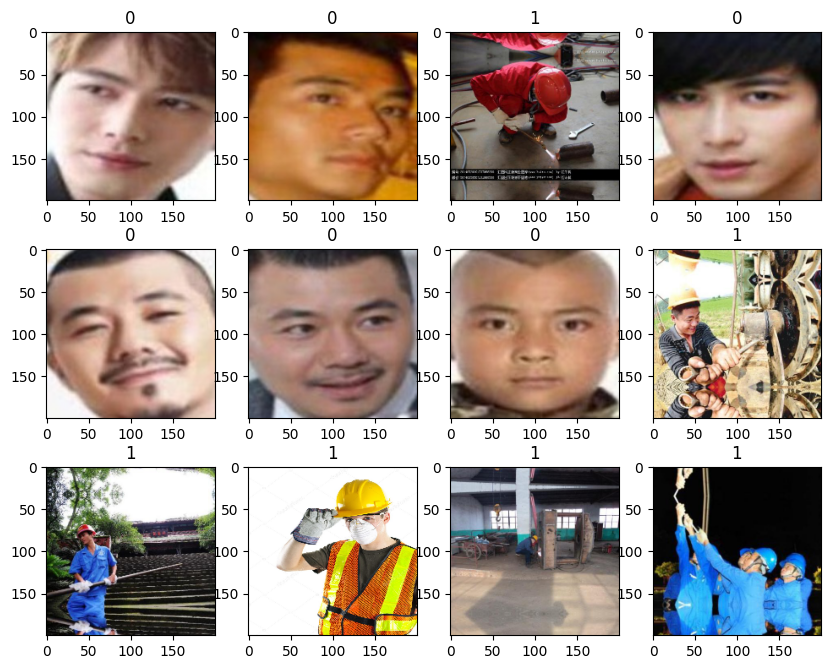

In [ ]:
plot_images(images, labels)

* The hard hat images come in varying settings, body positions, and background images.
* However, the images with no hard hats just seem to be head shots of random people. The non-hard hat wearing training data may be less effective than desired. This may result in high accuracy on anyone that has no hard helmet, but only if their whole head is in the image, as a glamour hehadshot.

## Checking for class imbalance


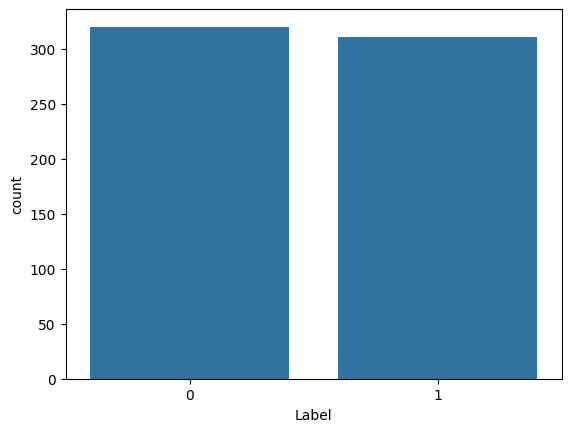

In [ ]:
sns.countplot(x='Label', data=labels)
plt.xticks(rotation = 0)
plt.show()

* The data is well balanced with about 300 1s and 300 0s indicating wearing hard hat and not wearing hard hat respectively.

# **Data Preprocessing**

## Converting images to grayscale

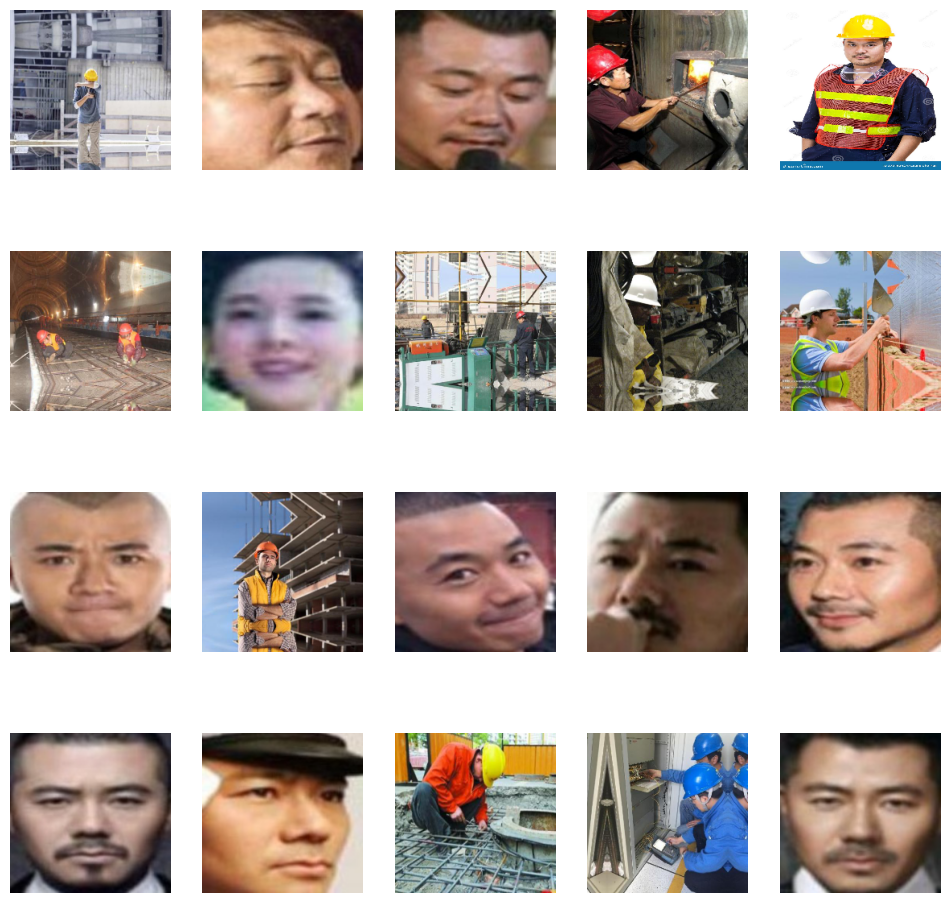

In [ ]:
# Plot 20 random images from image dataset
indices = np.random.choice(len(images), 20, replace=False)

plt.figure(figsize=(12, 12))
for idx, i in enumerate(indices):
    plt.subplot(4, 5, idx+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.show()


Resized images shape: (631, 224, 224, 3)


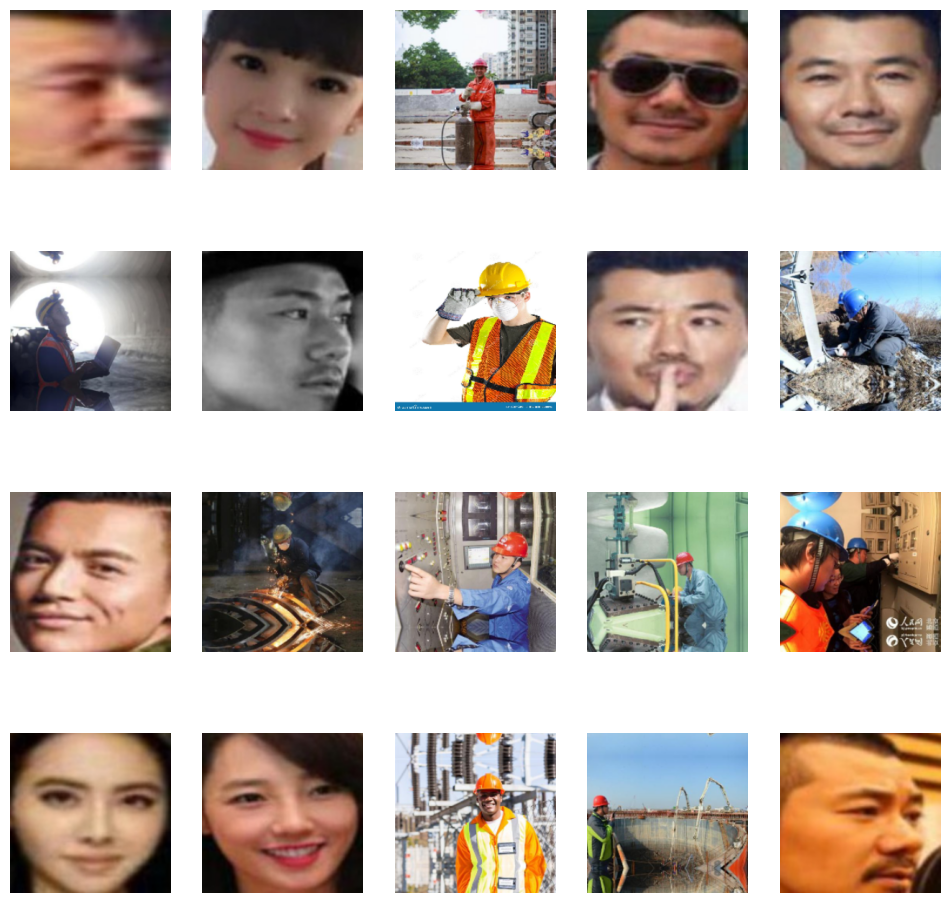

In [ ]:
# Resize images to 224x224 to match model input requirements
# Keep RGB (3 channels) for better feature extraction
img_resized = []

for i in range(len(images)):
    # Resize image to 224x224
    resized = cv2.resize(images[i], (224, 224))
    img_resized.append(resized)

# Convert list to numpy array
img_resized = np.array(img_resized)

print(f"Resized images shape: {img_resized.shape}")
# Expected output: (631, 224, 224, 3)

# Plot 20 random images to verify
indices = np.random.choice(len(img_resized), 20, replace=False)

plt.figure(figsize=(12, 12))
for idx, i in enumerate(indices):
    plt.subplot(4, 5, idx+1)
    plt.imshow(img_resized[i])  # No cmap needed for RGB
    plt.axis('off')

plt.show()

### Splitting the dataset



In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(img_resized),labels , test_size=0.2, random_state=42,stratify=labels)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

* Data is properly split amongst training, validation, and testing
* Amongst the training, validation, and testing data there are even distributions of 0 and 1 classified images.

### Data Normalization

In [ ]:
# Normalize pixel values to [0, 1] range
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
# Verify shapes match model expectations
print("Data shapes after preprocessing:")
print(f"X_train shape: {X_train.shape}")  # Should be (n, 224, 224, 3)
print(f"X_val shape: {X_val.shape}")      # Should be (n, 224, 224, 3)
print(f"X_test shape: {X_test.shape}")    # Should be (n, 224, 224, 3)
print(f"y_train shape: {y_train.shape}")

Data shapes after preprocessing:
X_train shape: (504, 224, 224, 3)
X_val shape: (63, 224, 224, 3)
X_test shape: (64, 224, 224, 3)
y_train shape: (504, 1)


# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors, verbose=0).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [ ]:


# Rebuild model with STRONGER regularization
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))  # Added dropout after first block

cnn_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))  # Added dropout after second block

cnn_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))  # Added dropout after third block

cnn_model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))  # Increased from 0.25 to 0.5

cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.5))  # Increased from 0.25 to 0.5

cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile with LOWER learning rate
from tensorflow.keras.optimizers import Adam
cnn_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Reduced from default 0.001
    metrics=['accuracy']
)


In [ ]:
model_history = cnn_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.9866 - loss: 0.0459 - val_accuracy: 0.7619 - val_loss: 0.6928
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9768 - loss: 0.0738 - val_accuracy: 0.7937 - val_loss: 0.5353
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9780 - loss: 0.0526 - val_accuracy: 0.8730 - val_loss: 0.4548
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9811 - loss: 0.0508 - val_accuracy: 0.7619 - val_loss: 0.8444
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9868 - loss: 0.0462 - val_accuracy: 0.8571 - val_loss: 0.5282
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9784 - loss: 0.0546 - val_accuracy: 0.8571 - val_loss: 0.5588
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9708 - loss: 0.0661 - val_accuracy: 0.8889 - val_loss: 0.4238
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9787 - loss: 0.0664 - val_accuracy: 0.8889 - 

### Vizualizing the predictions

In [ ]:
model_performance_classification_train_1 = model_performance_classification(cnn_model, X_train, y_train)

model_performance_classification_val_1 = model_performance_classification(cnn_model, X_val, y_val)

print("\n")

print(model_performance_classification_train_1)
print(model_performance_classification_val_1)



   Accuracy    Recall  Precision  F1 Score
0  0.946429  0.946429    0.95154  0.946228
   Accuracy    Recall  Precision  F1 Score
0  0.904762  0.904762   0.919799  0.903741


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


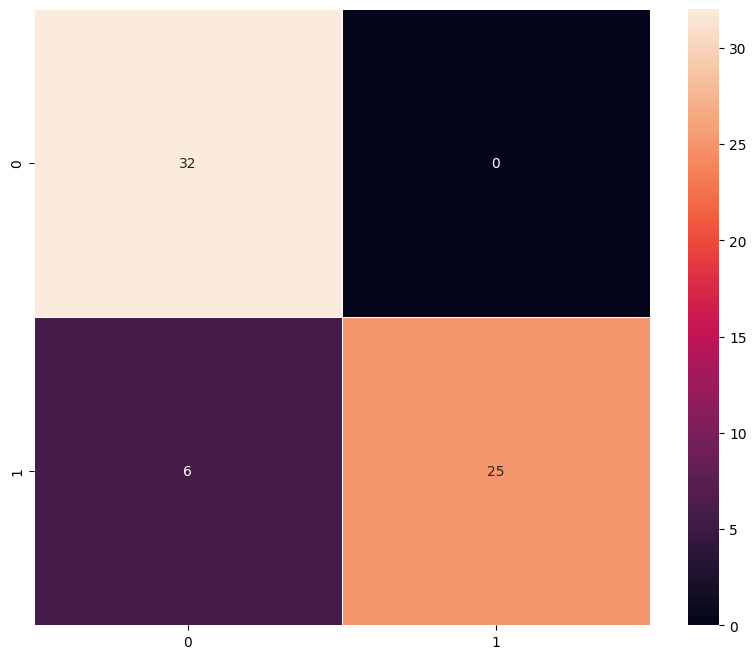

In [ ]:
plot_confusion_matrix(cnn_model, X_val, y_val)

In [ ]:
def plot_training_history(history, model_name=""):
    """
    Plot training history showing loss and accuracy curves
    Handles cases with or without validation data
    """
    # Extract history data
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Check if validation data exists
    has_validation = 'val_loss' in history.history

    if has_validation:
        val_loss = history.history['val_loss']
        val_acc = history.history['val_accuracy']

    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Loss curves
    axes[0].plot(epochs, train_loss, 'b-o', label='Training Loss', linewidth=2, markersize=6)
    if has_validation:
        axes[0].plot(epochs, val_loss, 'r-s', label='Validation Loss', linewidth=2, markersize=6)
        # Highlight best epoch (lowest val loss)
        best_epoch = np.argmin(val_loss) + 1
        axes[0].axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7,
                        label=f'Best Epoch: {best_epoch}')

    axes[0].set_xlabel('Epoch', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Loss', fontsize=14, fontweight='bold')
    title = 'Training and Validation Loss' if has_validation else 'Training Loss'
    axes[0].set_title(title, fontsize=16, fontweight='bold', pad=15)
    axes[0].legend(fontsize=12, loc='best')
    axes[0].grid(True, alpha=0.3)
    if len(epochs) <= 30:
        axes[0].set_xticks(epochs)

    # Plot 2: Accuracy curves
    axes[1].plot(epochs, train_acc, 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
    if has_validation:
        axes[1].plot(epochs, val_acc, 'r-s', label='Validation Accuracy', linewidth=2, markersize=6)
        axes[1].axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7,
                        label=f'Best Epoch: {best_epoch}')

    axes[1].set_xlabel('Epoch', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Accuracy', fontsize=14, fontweight='bold')
    title = 'Training and Validation Accuracy' if has_validation else 'Training Accuracy'
    axes[1].set_title(title, fontsize=16, fontweight='bold', pad=15)
    axes[1].legend(fontsize=12, loc='best')
    axes[1].grid(True, alpha=0.3)
    if len(epochs) <= 30:
        axes[1].set_xticks(epochs)

    # Overall title
    fig.suptitle(f'{model_name} - Training History', fontsize=18, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\n{'='*70}")
    print(f"{model_name} - TRAINING SUMMARY")
    print(f"{'='*70}")
    print(f"Total Epochs Trained: {len(epochs)}")

    if has_validation:
        print(f"Best Epoch: {best_epoch} (lowest validation loss)")
        print(f"\n{'Metric':<25} {'First Epoch':<15} {'Best Epoch':<15} {'Final Epoch':<15}")
        print("-"*70)
        print(f"{'Training Loss':<25} {train_loss[0]:<15.4f} {train_loss[best_epoch-1]:<15.4f} {train_loss[-1]:<15.4f}")
        print(f"{'Validation Loss':<25} {val_loss[0]:<15.4f} {val_loss[best_epoch-1]:<15.4f} {val_loss[-1]:<15.4f}")
        print(f"{'Training Accuracy':<25} {train_acc[0]:<15.4f} {train_acc[best_epoch-1]:<15.4f} {train_acc[-1]:<15.4f}")
        print(f"{'Validation Accuracy':<25} {val_acc[0]:<15.4f} {val_acc[best_epoch-1]:<15.4f} {val_acc[-1]:<15.4f}")
        print("-"*70)

        # Check for overfitting
        final_gap = train_acc[-1] - val_acc[-1]
        print(f"\nTrain-Val Accuracy Gap (Final Epoch): {final_gap:.4f}")
        if final_gap > 0.15:
            print("⚠️  WARNING: Large gap indicates OVERFITTING")
        elif final_gap > 0.10:
            print("⚠️  CAUTION: Moderate overfitting detected")
        else:
            print("✅ Good generalization - minimal overfitting")

        # Check if validation improved
        if val_loss[-1] > val_loss[0]:
            print("⚠️  WARNING: Validation loss increased - model didn't improve")
        else:
            print("✅ Validation loss decreased - model improved")
    else:
        # Training only - no validation data
        best_epoch = np.argmin(train_loss) + 1
        print(f"Best Epoch: {best_epoch} (lowest training loss)")
        print(f"\n{'Metric':<25} {'First Epoch':<15} {'Best Epoch':<15} {'Final Epoch':<15}")
        print("-"*70)
        print(f"{'Training Loss':<25} {train_loss[0]:<15.4f} {train_loss[best_epoch-1]:<15.4f} {train_loss[-1]:<15.4f}")
        print(f"{'Training Accuracy':<25} {train_acc[0]:<15.4f} {train_acc[best_epoch-1]:<15.4f} {train_acc[-1]:<15.4f}")
        print("-"*70)

        print("\n⚠️  NOTE: No validation data - Cannot assess generalization")
        print("   Recommend evaluating on separate validation set to check for overfitting")

    print(f"{'='*70}\n")

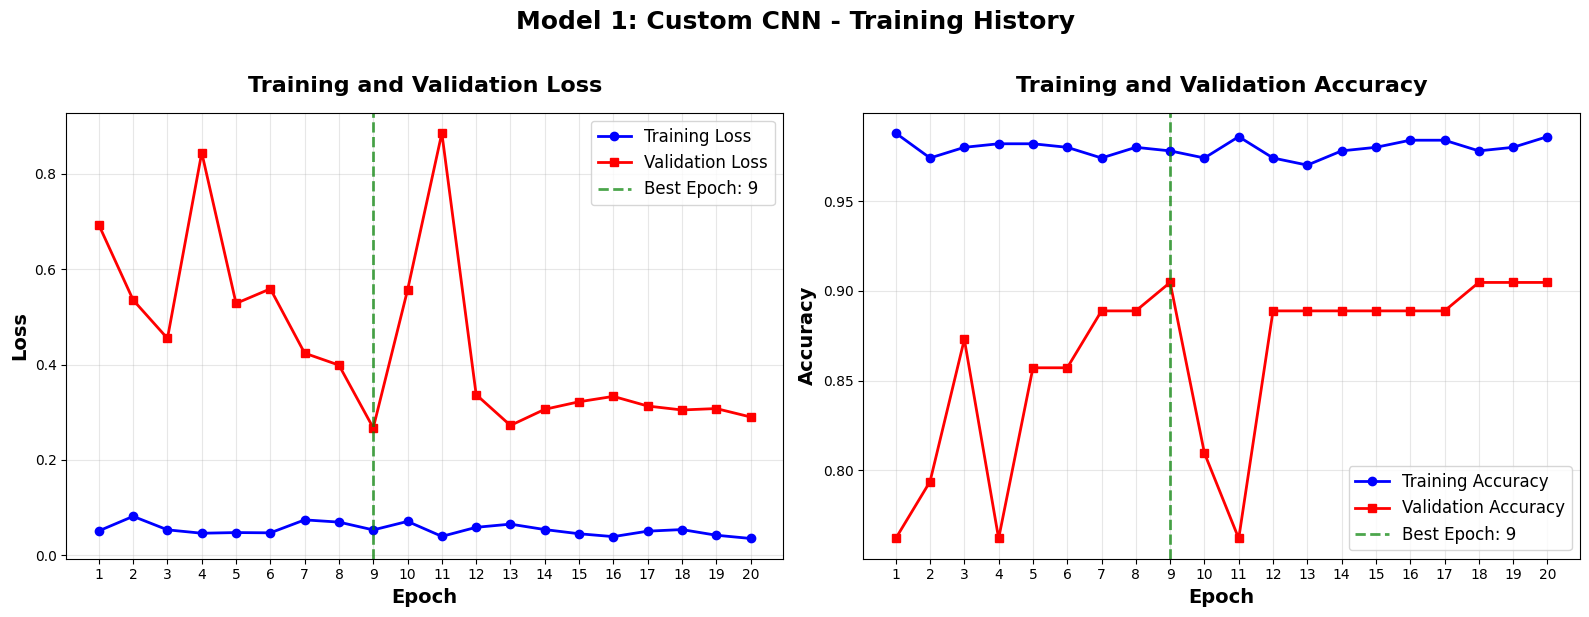


Model 1: Custom CNN - TRAINING SUMMARY
Total Epochs Trained: 20
Best Epoch: 9 (lowest validation loss)

Metric                    First Epoch     Best Epoch      Final Epoch    
----------------------------------------------------------------------
Training Loss             0.0511          0.0531          0.0352         
Validation Loss           0.6928          0.2671          0.2900         
Training Accuracy         0.9881          0.9782          0.9861         
Validation Accuracy       0.7619          0.9048          0.9048         
----------------------------------------------------------------------

Train-Val Accuracy Gap (Final Epoch): 0.0813
✅ Good generalization - minimal overfitting
✅ Validation loss decreased - model improved



In [ ]:
# Plot training history
plot_training_history(model_history, model_name="Model 1: Custom CNN")

## Model 2: (VGG-16 (Base))

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

vgg_base = VGG16(
    weights='imagenet',           # Use pre-trained ImageNet weights
    include_top=False,            # Exclude the final dense layers
    input_shape=(224, 224, 3)     # Our input shape
)

# Freeze all layers in the base model (don't retrain them)
vgg_base.trainable = False

# Display the base model architecture
print("="*70)
print("VGG16 BASE MODEL ARCHITECTURE")
print("="*70)
vgg_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 BASE MODEL ARCHITECTURE


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Build Model 2: VGG-16 Base with Global Average Pooling
model2_vgg_base = Sequential([
    vgg_base,                                          # Pre-trained VGG16 base
    layers.GlobalAveragePooling2D(),                   # Pool features to single vector
    layers.Dense(1, activation='sigmoid', name='output') # Binary classification
])

# Compile the model
model2_vgg_base.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Standard learning rate for frozen base
    metrics=['accuracy']
)

# Display the complete model
print("\n" + "="*70)
print("MODEL 2: VGG-16 (BASE) - COMPLETE ARCHITECTURE")
print("="*70)
model2_vgg_base.summary()

# Show trainable vs non-trainable parameters
print("\n" + "="*70)
print("PARAMETER SUMMARY")
print("="*70)
total_params = model2_vgg_base.count_params()

print(f"Total Parameters:        {total_params:,}")
print("="*70)


MODEL 2: VGG-16 (BASE) - COMPLETE ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


PARAMETER SUMMARY
Total Parameters:        14,715,201


In [ ]:
# Build Model 2: VGG-16 Base with Global Average Pooling
model2_vgg_base = Sequential([
    vgg_base,                                          # Pre-trained VGG16 base
    layers.GlobalAveragePooling2D(),                   # Pool features to single vector
    layers.Dense(1, activation='sigmoid', name='output') # Binary classification
])

# Compile the model
model2_vgg_base.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Standard learning rate for frozen base
    metrics=['accuracy']
)

# Display the complete model
print("\n" + "="*70)
print("MODEL 2: VGG-16 (BASE) - COMPLETE ARCHITECTURE")
print("="*70)
model2_vgg_base.summary()

# Show trainable vs non-trainable parameters
print("\n" + "="*70)
print("PARAMETER SUMMARY")
print("="*70)
total_params = model2_vgg_base.count_params()

print(f"Total Parameters:        {total_params:,}")
print("="*70)


MODEL 2: VGG-16 (BASE) - COMPLETE ARCHITECTURE


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


PARAMETER SUMMARY
Total Parameters:        14,715,201


In [ ]:
model2_history = model2_vgg_base.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5144 - loss: 0.7168 - val_accuracy: 0.9048 - val_loss: 0.5966
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.9219 - loss: 0.5801 - val_accuracy: 0.9841 - val_loss: 0.5151
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.9830 - loss: 0.4949 - val_accuracy: 0.9841 - val_loss: 0.4460
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.9878 - loss: 0.4293 - val_accuracy: 1.0000 - val_loss: 0.3889
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.9892 - loss: 0.3738 - val_accuracy: 1.0000 - val_loss: 0.3414
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 1.0000 - loss: 0.3273 - val_accuracy: 1.0000 - val_loss: 0.3023
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 1.0000 - loss: 0.2892 - val_accuracy: 1.0000 - val_loss: 0.2698
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 1.0000 - loss: 0.2577 - val_accuracy: 1.00

### Visualizing the prediction:

In [ ]:
model_performance_classification_train_2 = model_performance_classification(model2_vgg_base, X_train, y_train)

model_performance_classification_val_2 = model_performance_classification(model2_vgg_base, X_val, y_val)

print("\n")

print(model_performance_classification_train_2)
print(model_performance_classification_val_2)



   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


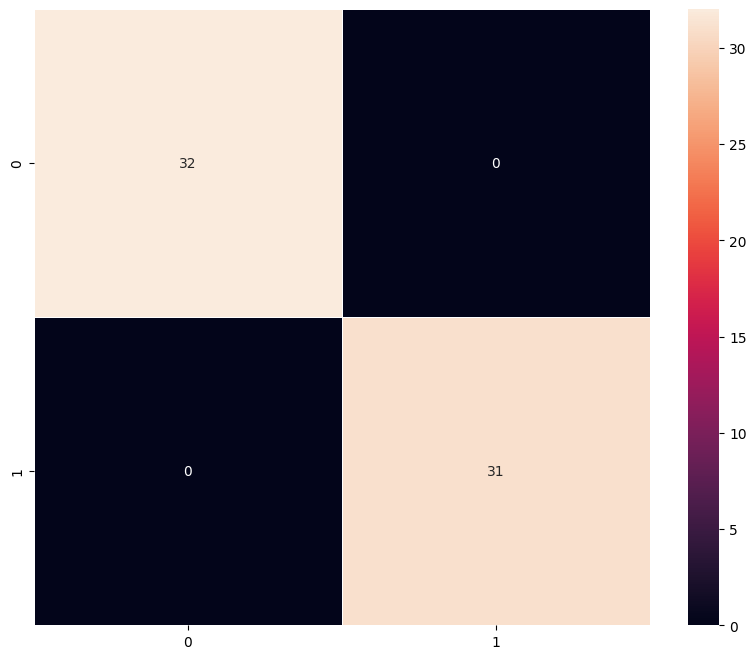

In [ ]:
plot_confusion_matrix(model2_vgg_base, X_val, y_val)

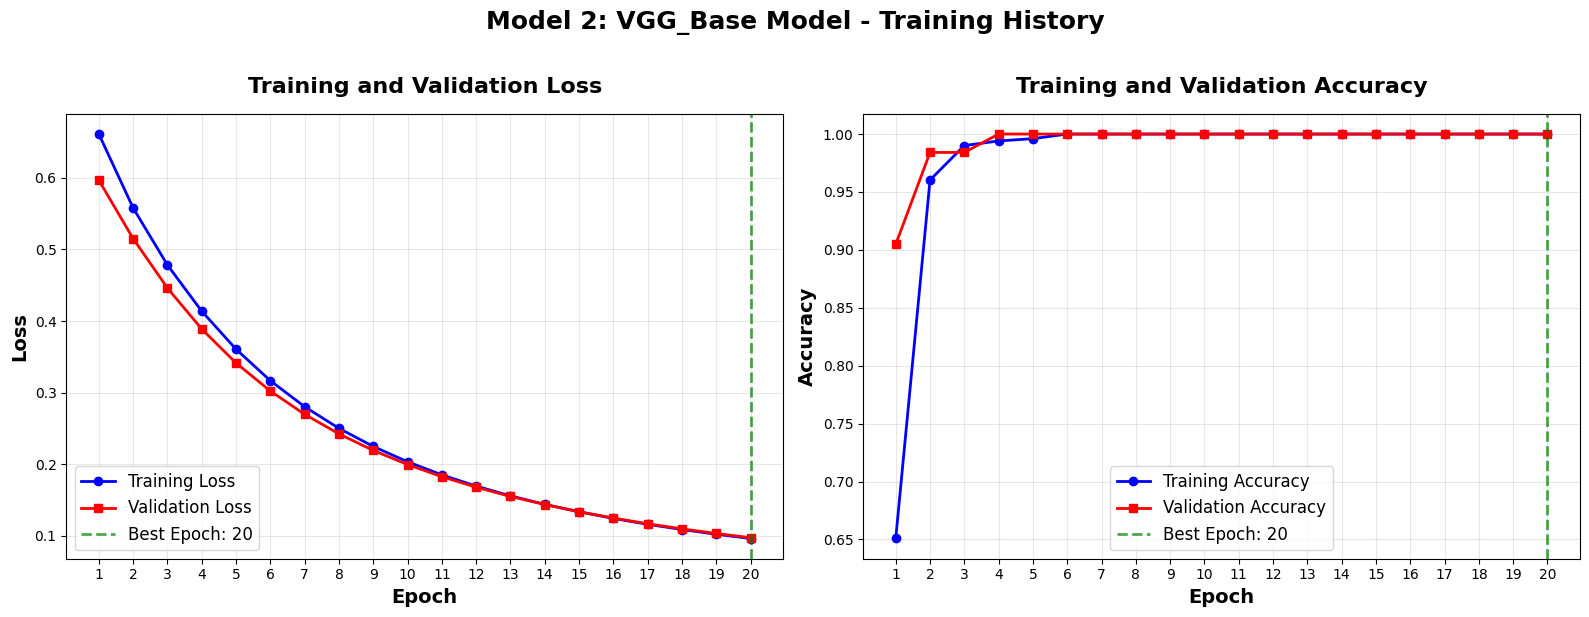


Model 2: VGG_Base Model - TRAINING SUMMARY
Total Epochs Trained: 20
Best Epoch: 20 (lowest validation loss)

Metric                    First Epoch     Best Epoch      Final Epoch    
----------------------------------------------------------------------
Training Loss             0.6612          0.0963          0.0963         
Validation Loss           0.5966          0.0975          0.0975         
Training Accuracy         0.6508          1.0000          1.0000         
Validation Accuracy       0.9048          1.0000          1.0000         
----------------------------------------------------------------------

Train-Val Accuracy Gap (Final Epoch): 0.0000
✅ Good generalization - minimal overfitting
✅ Validation loss decreased - model improved



In [ ]:
plot_training_history(model2_history, model_name="Model 2: VGG_Base Model")

* This seems highly unlikely but the model did not predict all ones or zeros. It has an even number of ones and zeros in the validation data, all predicted accurately in the validation set.
* The training and validation data have been properly divided without data leackage.
* Even though having perfect performance on the training and test data is unlikely, it seems to have done so.
* No gap between training and validation makes me very suspicious, even still

## Model 3: (VGG-16 (Base + FFNN))

In [ ]:
# Clear session
from tensorflow.keras import backend as K
K.clear_session()

# Load VGG16 base (same as Model 2)
vgg_base_model3 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
vgg_base_model3.trainable = False

# Build Model 3 with FFNN (Feedforward Neural Network)
model3_vgg_ffnn = Sequential([
    vgg_base_model3,                                    # VGG-16 base
    layers.GlobalAveragePooling2D(),                    # Pool features

    # FFNN layers (this is the difference from Model 2)
    layers.Dense(256, activation='relu', name='fc1'),   # First hidden layer
    layers.BatchNormalization(),                         # Normalize activations
    layers.Dropout(0.5),                                 # Dropout for regularization

    layers.Dense(128, activation='relu', name='fc2'),   # Second hidden layer
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', name='fc3'),    # Third hidden layer
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid', name='output') # Output layer
])

# Compile the model
model3_vgg_ffnn.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Display model architecture
print("="*70)
print("MODEL 3: VGG-16 (BASE + FFNN) - ARCHITECTURE")
print("="*70)
model3_vgg_ffnn.summary()

# Show parameter breakdown
print("\n" + "="*70)
print("PARAMETER SUMMARY")
print("="*70)
total_params = model3_vgg_ffnn.count_params()
trainable_params = sum([K.count_params(w) for w in model3_vgg_ffnn.trainable_weights])
non_trainable_params = total_params - trainable_params

print(f"Total Parameters:         {total_params:,}")
print(f"Trainable Parameters:     {trainable_params:,}")
print(f"Non-trainable Parameters: {non_trainable_params:,}")
print(f"Percentage Trainable:     {(trainable_params/total_params)*100:.2f}%")
print("="*70)

MODEL 3: VGG-16 (BASE + FFNN) - ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,888,769 (56.80 MB)

 Trainable params: 173,313 (677.00 KB)

 Non-trainable params: 14,715,456 (56.14 MB)


PARAMETER SUMMARY
Total Parameters:         14,888,769
Trainable Parameters:     173,313
Non-trainable Parameters: 14,715,456
Percentage Trainable:     1.16%


In [ ]:
model3_history = model3_vgg_ffnn.fit(
    X_train, y_train,
    batch_size=32,
    epochs=25,  # More epochs since we have more parameters to train
    validation_data=(X_val, y_val),
    verbose=1
)

print("\n✅ Model 3 training complete!")

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 555ms/step - accuracy: 0.7679 - loss: 0.4902 - val_accuracy: 0.9683 - val_loss: 0.5511
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.9603 - loss: 0.0997 - val_accuracy: 1.0000 - val_loss: 0.4159
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.9790 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.3104
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.9927 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.2456
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9841 - val_loss: 0.2178
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9841 - val_loss: 0.1820
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.9964 - loss: 0.0132 - val_accuracy: 0.9841 - val_loss: 0.1621
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9991 - loss: 0.0064 - val_accuracy: 0

#### Visualizing the predictions

In [ ]:
model_performance_classification_train_3 = model_performance_classification(model3_vgg_ffnn, X_train, y_train)
model_performance_classification_val_3 = model_performance_classification(model3_vgg_ffnn, X_val, y_val)

print(model_performance_classification_train_3)
print(model_performance_classification_val_3)

   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


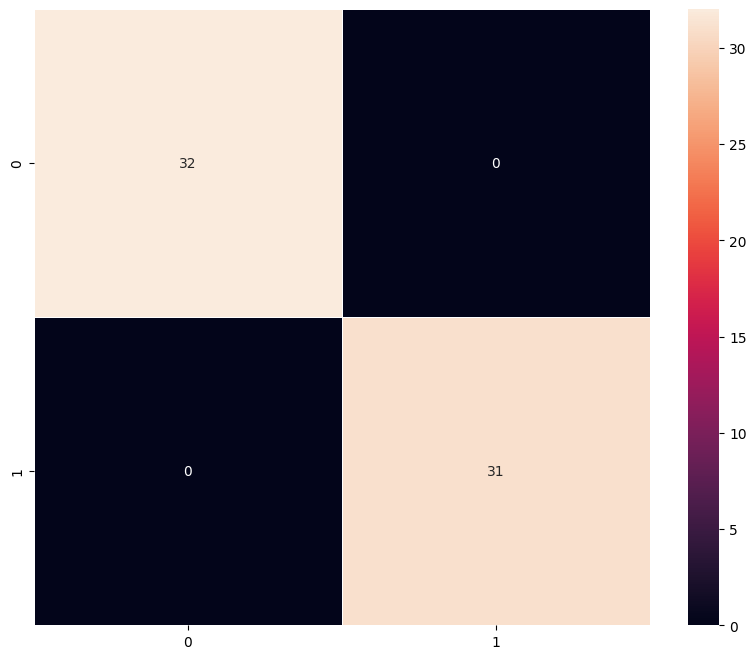

In [ ]:
plot_confusion_matrix(model3_vgg_ffnn, X_val, y_val)

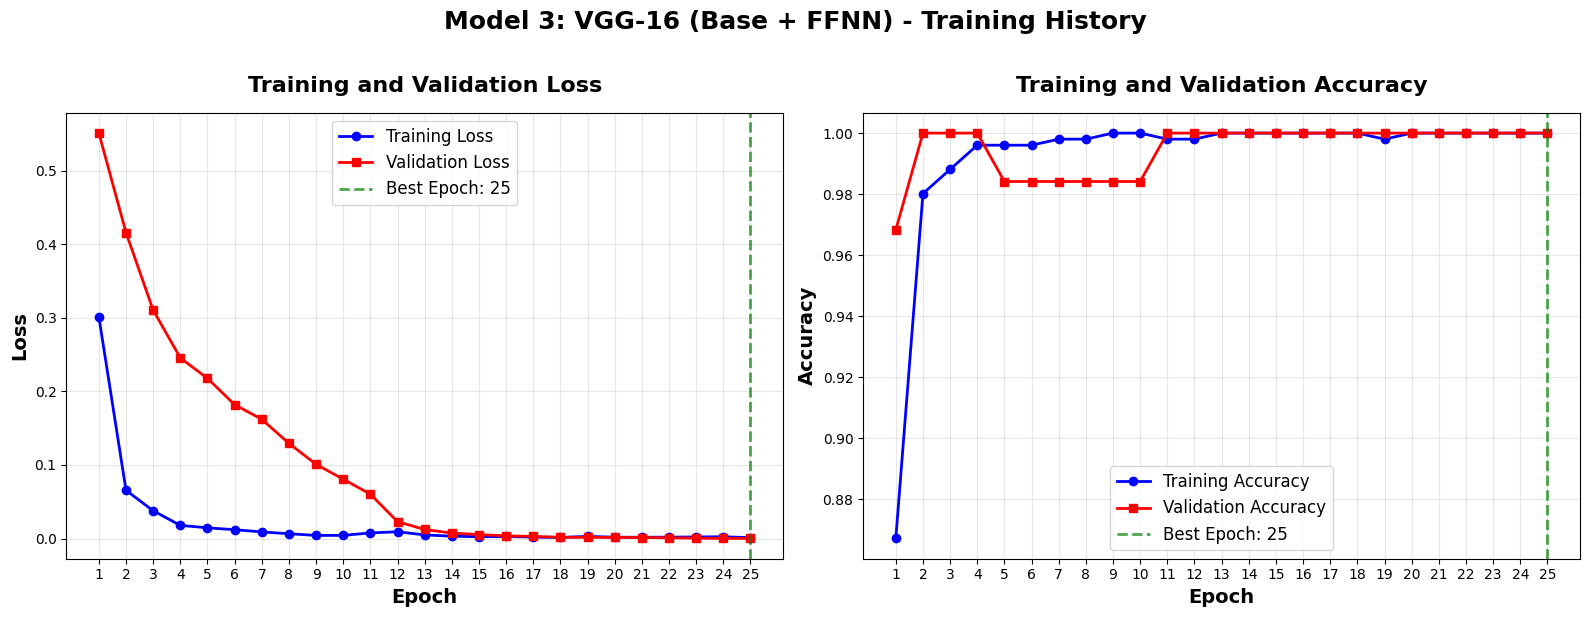


Model 3: VGG-16 (Base + FFNN) - TRAINING SUMMARY
Total Epochs Trained: 25
Best Epoch: 25 (lowest validation loss)

Metric                    First Epoch     Best Epoch      Final Epoch    
----------------------------------------------------------------------
Training Loss             0.3014          0.0012          0.0012         
Validation Loss           0.5511          0.0001          0.0001         
Training Accuracy         0.8671          1.0000          1.0000         
Validation Accuracy       0.9683          1.0000          1.0000         
----------------------------------------------------------------------

Train-Val Accuracy Gap (Final Epoch): 0.0000
✅ Good generalization - minimal overfitting
✅ Validation loss decreased - model improved



In [ ]:
plot_training_history(model3_history, model_name="Model 3: VGG-16 (Base + FFNN)")

* This model, performed the same as the previous model, model 2.
* Very unexpected and I am not sure if the issue is something else.
* Either way the model is performing well with a perfect performance on validation data.
* We will check these models on testing data at the end to ensure that the validation data has not somehow succumbed to data leakage.
Epoch 12 seems to be the best point at which training and validation merge.

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Data augmentation for TRAINING ONLY
train_datagen = ImageDataGenerator(
    rotation_range=20,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by 20%
    height_shift_range=0.2,      # Randomly shift images vertically by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    zoom_range=0.2,              # Randomly zoom in/out by 20%
    shear_range=0.15,            # Randomly shear images
    fill_mode='nearest'          # Fill in new pixels with nearest neighbors
)

# NO augmentation for validation/test - just normalization
val_datagen = ImageDataGenerator()  # No augmentation, just passes data through

print("="*70)
print("DATA AUGMENTATION SETUP")
print("="*70)
print("✅ Training data: WITH augmentation (rotation, flip, zoom, shift, shear)")
print("✅ Validation data: NO augmentation (original images only)")
print("✅ Test data: NO augmentation (original images only)")
print("="*70)

DATA AUGMENTATION SETUP
✅ Training data: WITH augmentation (rotation, flip, zoom, shift, shear)
✅ Validation data: NO augmentation (original images only)
✅ Test data: NO augmentation (original images only)



🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨
VISUALIZING DATA AUGMENTATION (FIXED)
🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨🎨



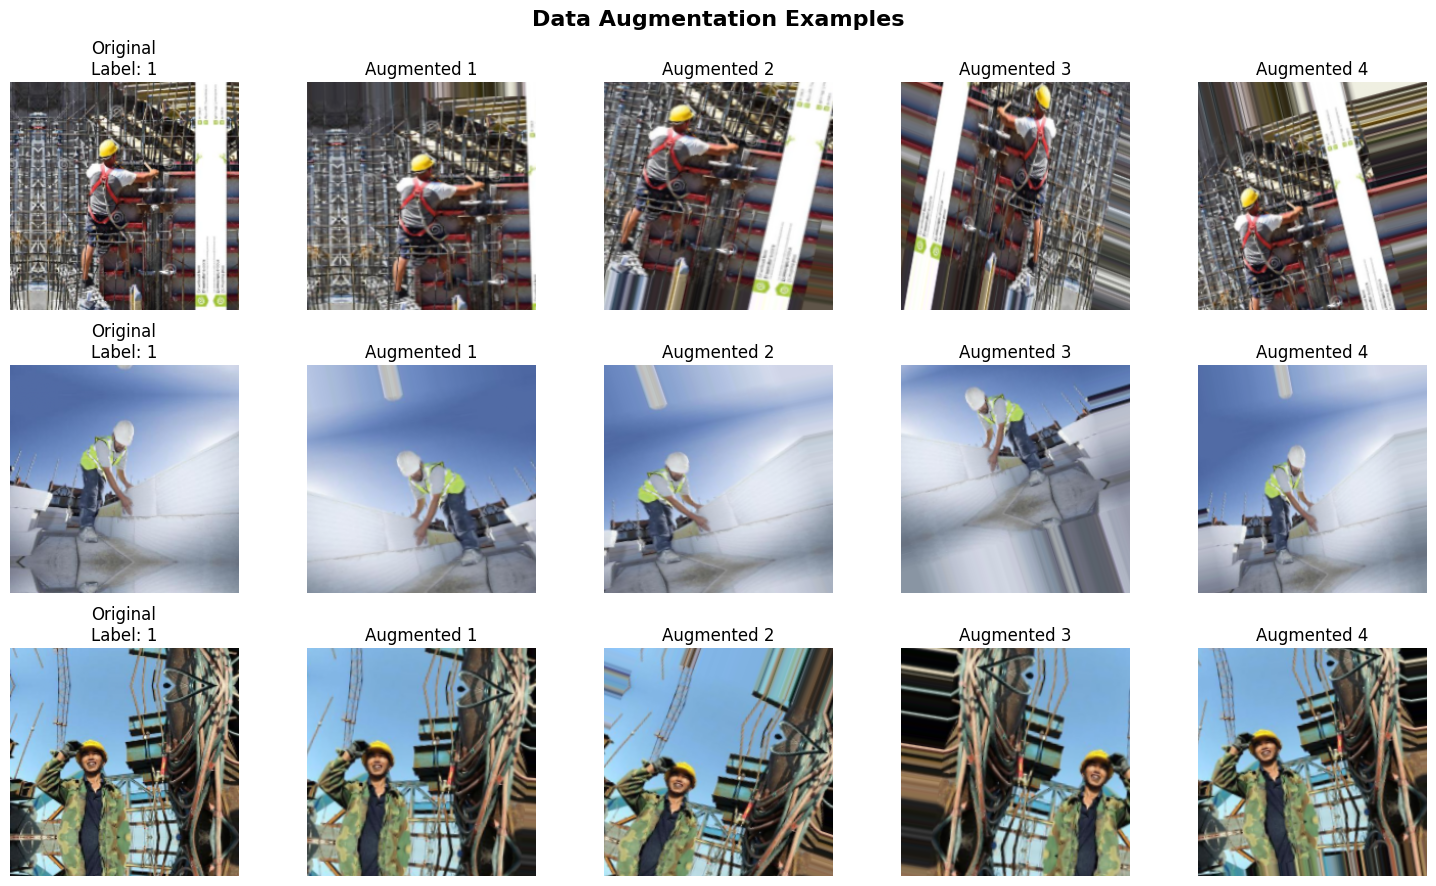

In [ ]:
def visualize_augmentation(images, labels, num_examples=5):
    """
    Show original vs augmented images (FIXED for normalized data)
    """
    fig, axes = plt.subplots(num_examples, 5, figsize=(15, 3*num_examples))

    for i in range(num_examples):
        # Original image - clip to valid range
        axes[i, 0].imshow(np.clip(images[i], 0, 1))  # Ensure 0-1 range
        axes[i, 0].set_title(f'Original\nLabel: {labels.iloc[i, 0]}')
        axes[i, 0].axis('off')

        # Generate 4 augmented versions
        img = images[i].reshape((1,) + images[i].shape)
        aug_iter = train_datagen.flow(img, batch_size=1)

        for j in range(1, 5):
            aug_img = next(aug_iter)[0]
            # Clip to valid range for display
            aug_img = np.clip(aug_img, 0, 1)
            axes[i, j].imshow(aug_img)
            axes[i, j].set_title(f'Augmented {j}')
            axes[i, j].axis('off')

    plt.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualize augmentation on training data
print("\n" + "🎨"*35)
print("VISUALIZING DATA AUGMENTATION (FIXED)")
print("🎨"*35 + "\n")
visualize_augmentation(X_train, y_train, num_examples=3)

In [ ]:
# Clear session
from tensorflow.keras import backend as K
K.clear_session()

# Load VGG16 base
vgg_base_model4 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
vgg_base_model4.trainable = False

# Build Model 4 (same architecture as Model 3)
model4_vgg_ffnn_aug = Sequential([
    vgg_base_model4,                                    # VGG-16 base
    layers.GlobalAveragePooling2D(),                    # Pool features

    # FFNN layers
    layers.Dense(256, activation='relu', name='fc1'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu', name='fc2'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', name='fc3'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid', name='output')
])

# Compile the model
model4_vgg_ffnn_aug.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print("="*70)
print("MODEL 4: VGG-16 (BASE + FFNN + DATA AUGMENTATION) - ARCHITECTURE")
print("="*70)
model4_vgg_ffnn_aug.summary()

MODEL 4: VGG-16 (BASE + FFNN + DATA AUGMENTATION) - ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,888,769 (56.80 MB)

 Trainable params: 173,313 (677.00 KB)

 Non-trainable params: 14,715,456 (56.14 MB)

In [ ]:
# Train Model 4 with data augmentation
print("\n" + "🚀"*35)
print("TRAINING MODEL 4: VGG-16 (BASE + FFNN + DATA AUGMENTATION)")
print("🚀"*35 + "\n")

# Use fit() with generators
model4_history = model4_vgg_ffnn_aug.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),  # Augmented training data
    steps_per_epoch=len(X_train) // 32,                   # Number of batches per epoch
    epochs=30,                                             # More epochs due to augmentation
    validation_data=(X_val, y_val),                       # NO augmentation on validation
    verbose=1
)

print("\n✅ Model 4 training complete!")


🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
TRAINING MODEL 4: VGG-16 (BASE + FFNN + DATA AUGMENTATION)
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6785 - loss: 0.7466 - val_accuracy: 0.6032 - val_loss: 0.5419
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9062 - loss: 0.2534 - val_accuracy: 0.6825 - val_loss: 0.5275
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step - accuracy: 0.9757 - loss: 0.0883 - val_accuracy: 0.9524 - val_loss: 0.3618
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.0644 - val_accuracy: 0.9524 - val_loss: 0.3530
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 482ms/step - accuracy: 0.9892 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 0.2488
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.2440
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.9963 - loss: 0.0213 - val_accuracy: 1.

#### Visualizing the predictions

In [ ]:
model_performance_classification_train_4 = model_performance_classification(model4_vgg_ffnn_aug, X_train, y_train)
model_performance_classification_val_4= model_performance_classification(model4_vgg_ffnn_aug, X_val, y_val)

print(model_performance_classification_train_4)
print(model_performance_classification_val_4)

   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


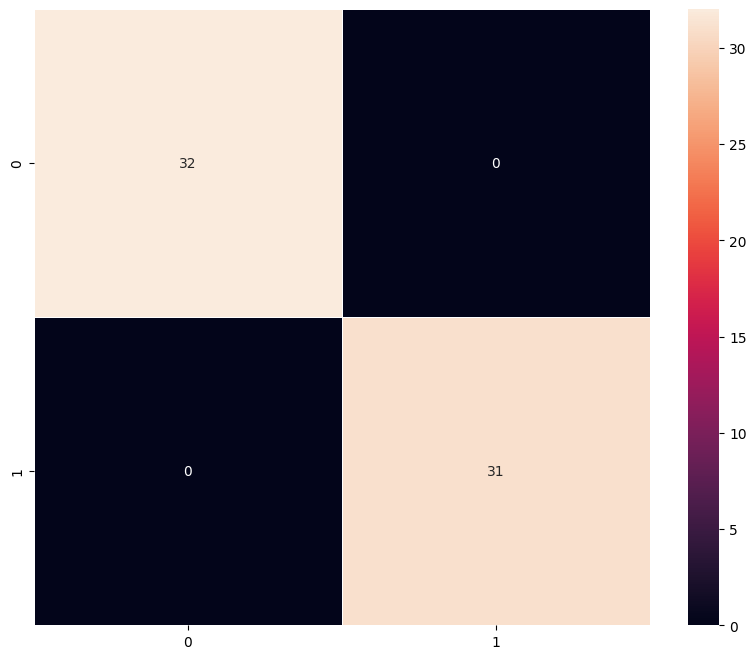

In [ ]:
plot_confusion_matrix(model4_vgg_ffnn_aug, X_val, y_val)

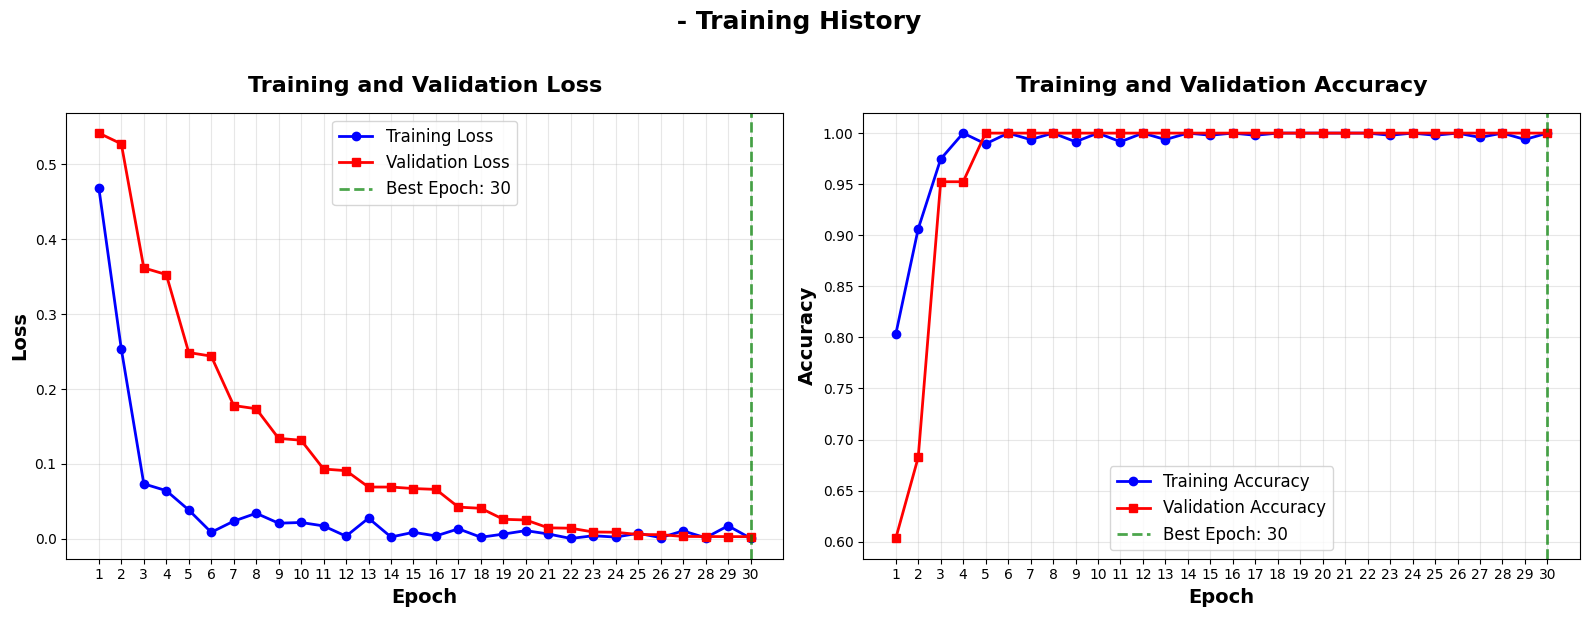


 - TRAINING SUMMARY
Total Epochs Trained: 30
Best Epoch: 30 (lowest validation loss)

Metric                    First Epoch     Best Epoch      Final Epoch    
----------------------------------------------------------------------
Training Loss             0.4684          0.0009          0.0009         
Validation Loss           0.5419          0.0029          0.0029         
Training Accuracy         0.8030          1.0000          1.0000         
Validation Accuracy       0.6032          1.0000          1.0000         
----------------------------------------------------------------------

Train-Val Accuracy Gap (Final Epoch): 0.0000
✅ Good generalization - minimal overfitting
✅ Validation loss decreased - model improved



In [ ]:
plot_training_history(model4_history)

* Same scenario with both model 2 and 3.
* I will test all of these against test data, that has surely not been trained.
* I want to ensure that all of these models have not suffered from data leakage on the validation set.
* Both data sets are offering an even number of ones and zeros to predict on, so the data set is not just unexpectedly one sided.

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_performance_classification_train_1.T,
        model_performance_classification_train_2.T,
        model_performance_classification_train_3.T,
        model_performance_classification_train_4.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "CNN", "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_val_comp_df = pd.concat(
    [
        model_performance_classification_val_1.T,
        model_performance_classification_val_2.T,
        model_performance_classification_val_3.T,
        model_performance_classification_val_4.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "CNN", "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
print("Training Data Performance")
models_train_comp_df

Training Data Performance


CNN  VGG-16 (Base)  VGG-16 (Base+FFNN)  \
Accuracy   0.946429            1.0                 1.0   
Recall     0.946429            1.0                 1.0   
Precision  0.951540            1.0                 1.0   
F1 Score   0.946228            1.0                 1.0   

           VGG-16 (Base+FFNN+Data Aug)  
Accuracy                           1.0  
Recall                             1.0  
Precision                          1.0  
F1 Score                           1.0

In [ ]:
print("Validation Data Performance")
models_val_comp_df

Validation Data Performance


CNN  VGG-16 (Base)  VGG-16 (Base+FFNN)  \
Accuracy   0.904762            1.0                 1.0   
Recall     0.904762            1.0                 1.0   
Precision  0.919799            1.0                 1.0   
F1 Score   0.903741            1.0                 1.0   

           VGG-16 (Base+FFNN+Data Aug)  
Accuracy                           1.0  
Recall                             1.0  
Precision                          1.0  
F1 Score                           1.0

* All the VGG models: Base, Base+FFNN, and Dase+FNN+Data augmentation, performed exceedingly well.
* My suspicion is that the training data and the validation data had so many distinct features that allowed for them to become very well equipped to handle both data sets, given their feature similarity
* The hard hats were perfectly yellow and stood out in all the pictures. The individuals without hard hats were essentially headshots, in both the training and validation data sets. This resulted in an image with a full face taking up each image for those not wearing hard hats. It would have been easy for the model to predict who was not wearing a hard hat because it was just a face taking up almost the entirety of the image and anything that wasn't that was labeled as a hard hat. I believe it picked up on this pattern.
* In short, I think the data is flawed for training and validation purposes.



### Model selection and Testing

* Given the fact that all VGG models performed perfectly, I will choose the one that has the best chance to perform well on the test data, given theory.
* Theoretically, the VGG Base + FNN + Data Augmentation, has the capacity to deal with non-conformity in the testing data, if it is there.
* Because of this, I will choose to work with model 4.

In [ ]:
model_4_performance_test = model_performance_classification(model4_vgg_ffnn_aug, X_test, y_test)

In [ ]:
model_4_performance_test

Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


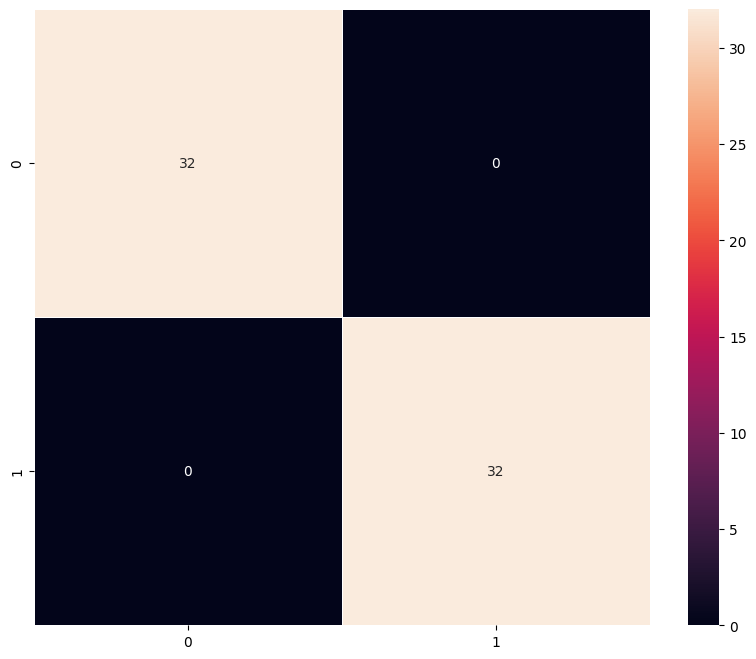

In [ ]:
plot_confusion_matrix(model4_vgg_ffnn_aug, X_test, y_test)

# **Actionable Insights & Recommendations**

- The data set is flawed. There is almost no variation in the images for training, validating, and testing for no hard hats.
- This gives a serious pattern for non-hard hat wearers as well as displaying any other image as the alternative choice (i.e. wearing hard hat)
- Given the data, all the VGG models performed with perfection on the validation set, which is surprising, but probably not so surprising given the data set.
- We chose the best theoretical VGG model, which is the one that involved Data augmentation.
- The model can be used, tentatively to identify individuals wearing hard hats, but should be even more cautious with identifying those who are not wearing hard hats.
- With better data, of equivalent size, I believe the VGG with FFNN and Data augmentation would be the ideal model for performance.
- I would recommend an evaluation of the data, changes in the data images, particularly the non-hard hat wearers, and retraining with the above selected model. This would give an indication of the data's quality and help adjust the model to a more realistic result on more world data in the industrial workplace.
- These models performing perfect on both training and validation set with no gap is very unexpected.

<font size=5 color='blue'>Power Ahead!</font>
___